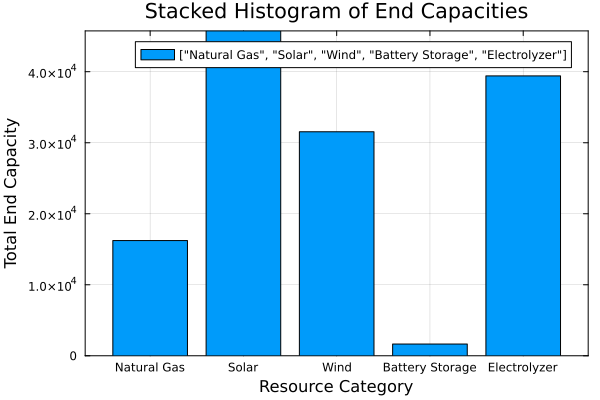

In [1]:
using DataFrames, CSV, Plots

# Load the CSV file
file_path = "example_systems/2_three_zones_w_electrolyzer/results_8/capacity.csv"  # Replace with the actual path
df = CSV.read(file_path, DataFrame, missingstring="n/a")

# Filter out the "Total" row and create a new DataFrame
data = filter(:Resource => !=("Total"), df)

# Resource categories for stacking
categories = Dict(
    "MA_natural_gas_combined_cycle" => "Natural Gas",
    "CT_natural_gas_combined_cycle" => "Natural Gas",
    "ME_natural_gas_combined_cycle" => "Natural Gas",
    "MA_solar_pv" => "Solar",
    "CT_solar_pv" => "Solar",
    "CT_onshore_wind" => "Wind",
    "ME_onshore_wind" => "Wind",
    "MA_battery" => "Battery Storage",
    "CT_battery" => "Battery Storage",
    "ME_battery" => "Battery Storage",
    "MA_battery_for_electrolyzer" => "Battery Storage",
    "CT_battery_for_electrolyzer" => "Battery Storage",
    "ME_battery_for_electrolyzer" => "Battery Storage",
    "MA_battery_cheap" => "Battery Storage",
    "ME_battery_for_electrolyzer_cheap" => "Battery Storage",
    "MA_electrolyzer" => "Electrolyzer",
    "CT_electrolyzer" => "Electrolyzer",
    "ME_electrolyzer" => "Electrolyzer",
)

# Assign categories to the DataFrame based on "Resource"
data.Category = map(x -> categories[x], data.Resource)

# Group by category and sum "EndCap" values
grouped_data = combine(groupby(data, :Category), :EndCap => sum)

# Prepare data for stacked histogram
labels = grouped_data.Category
values = grouped_data.EndCap_sum 

# Create stacked bar plot
bar(labels, values, stack = true,
    xlabel = "Resource Category", 
    ylabel = "Total End Capacity", 
    title = "Stacked Histogram of End Capacities",
    label = labels,  # Use category names as labels
    legend = :topright,  # Adjust legend position
    bar_width = 0.8, # Adjust bar width for aesthetics
    framestyle = :box)

# Display plot
display(plot!())